# Approach one

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("IceCreamSales.csv")

In [3]:
data.head()

,Unnamed: 0,Temperature,IceCreamSales
0,0,21.952540,21200.216232
1,1,28.607575,46969.537759
2,2,24.110535,28155.054323
3,3,21.795327,20730.330804
4,4,16.946192,9907.404501


In [5]:
data.drop(['Unnamed: 0'], axis = 1, inplace= True)

In [6]:
data

,Temperature,IceCreamSales
0,21.952540,21200.216232
1,28.607575,46969.537759
2,24.110535,28155.054323
3,21.795327,20730.330804
4,16.946192,9907.404501
...,...,...
95,7.327654,920.989509
96,23.460517,25884.973575
97,0.804302,66.563119
98,33.157601,72985.915190


In [8]:
X = data[['Temperature']]

In [9]:
y = data['IceCreamSales']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
xtrain, xtest, ytrain, ytest = train_test_split(X,y, test_size=0.2)

In [12]:
xtrain.shape,ytrain.shape

((80, 1), (80,))

In [13]:
xtest.shape, ytest.shape

((20, 1), (20,))

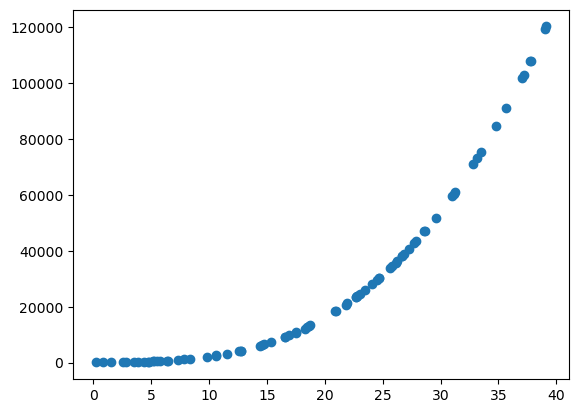

In [15]:
plt.scatter(xtrain,ytrain)

In [14]:
from sklearn.linear_model import LinearRegression

In [16]:
l_reg = LinearRegression()
l_reg.fit(xtrain, ytrain)

LinearRegression()

In [17]:
ypred = l_reg.predict(xtest)

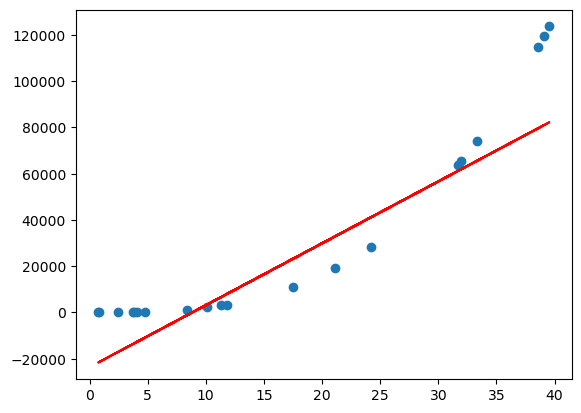

In [19]:
plt.scatter(xtest,ytest)
plt.plot(xtest, ypred, c = 'r')

In [20]:
from sklearn.metrics import r2_score
r2_score(ypred,ytest)

0.7452844909095606

# Transform the data then use approach one

In [21]:
data = pd.read_csv("IceCreamSales.csv")
data.drop(['Unnamed: 0'], axis = 1, inplace= True)
X = data[['Temperature']]
y = data['IceCreamSales']

In [22]:
from sklearn.preprocessing import PolynomialFeatures

In [23]:
p_feature = PolynomialFeatures(degree = 2)

In [25]:
x_transformed = p_feature.fit_transform(X)

In [27]:
x_transformed[:,-1]

array([4.81914019e+02, 8.18393328e+02, 5.81317900e+02, 4.75036293e+02,
       2.87173422e+02, 6.67486728e+02, 3.06372108e+02, 1.27241454e+03,
       1.48583347e+03, 2.35243837e+02, 1.00292566e+03, 4.47567738e+02,
       5.16279397e+02, 1.37076662e+03, 8.07379450e+00, 1.21464238e+01,
       6.54053752e-01, 1.10920929e+03, 9.68844686e+02, 1.21107382e+03,
       1.53231018e+03, 1.02184706e+03, 3.40741123e+02, 9.74761272e+02,
       2.23821437e+01, 6.55198262e+02, 3.28802640e+01, 1.42783898e+03,
       4.35721073e+02, 2.75111239e+02, 1.11983475e+02, 9.59100489e+02,
       3.32917001e+02, 5.16987447e+02, 5.64890561e-01, 6.10357772e+02,
       5.99457878e+02, 6.08972090e+02, 1.42505670e+03, 7.43806272e+02,
       2.06793489e+02, 3.05595086e+02, 7.78702857e+02, 5.80337189e+00,
       7.11324565e+02, 7.19608243e+02, 7.08173152e+01, 2.65951844e+01,
       1.59192071e+02, 2.11656840e+02, 5.20198971e+02, 3.07794060e+02,
       1.56301255e+03, 1.66610294e+01, 6.98071988e+01, 4.16332169e+01,
      

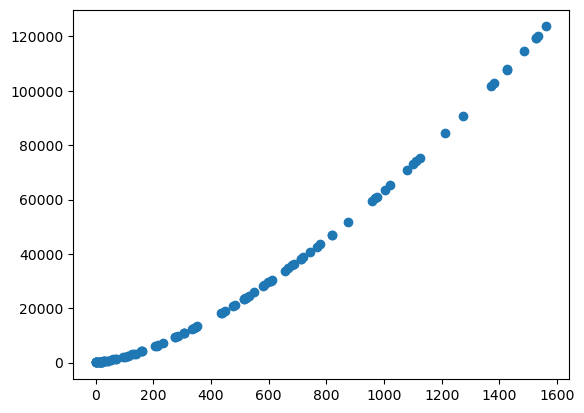

In [29]:
plt.scatter(x_transformed[:,-1], y)

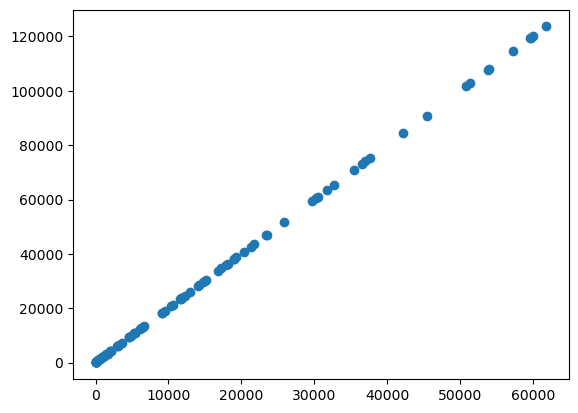

In [30]:
p_feature = PolynomialFeatures(degree = 3)
x_transformed = p_feature.fit_transform(X)
x_transformed[:,-1]
plt.scatter(x_transformed[:,-1], y)

In [31]:
x_transformed

array([[1.00000000e+00, 2.19525402e+01, 4.81914019e+02, 1.05792369e+04],
       [1.00000000e+00, 2.86075747e+01, 8.18393328e+02, 2.34122482e+04],
       [1.00000000e+00, 2.41105350e+01, 5.81317900e+02, 1.40158856e+04],
       [1.00000000e+00, 2.17953273e+01, 4.75036293e+02, 1.03535715e+04],
       [1.00000000e+00, 1.69461920e+01, 2.87173422e+02, 4.86649595e+03],
       [1.00000000e+00, 2.58357645e+01, 6.67486728e+02, 1.72450299e+04],
       [1.00000000e+00, 1.75034885e+01, 3.06372108e+02, 5.36258065e+03],
       [1.00000000e+00, 3.56709200e+01, 1.27241454e+03, 4.53881972e+04],
       [1.00000000e+00, 3.85465104e+01, 1.48583347e+03, 5.72736952e+04],
       [1.00000000e+00, 1.53376608e+01, 2.35243837e+02, 3.60809017e+03],
       [1.00000000e+00, 3.16690015e+01, 1.00292566e+03, 3.17616542e+04],
       [1.00000000e+00, 2.11557968e+01, 4.47567738e+02, 9.46865211e+03],
       [1.00000000e+00, 2.27217824e+01, 5.16279397e+02, 1.17307881e+04],
       [1.00000000e+00, 3.70238655e+01, 1.37076662e

In [39]:
X = np.array([x_transformed[:,-1]])

In [43]:
X.shape

(1, 100)

In [44]:
X.T.shape

(100, 1)

In [45]:
X =  X.T

In [46]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

In [47]:
from sklearn.linear_model import LinearRegression
l_reg = LinearRegression()
l_reg.fit(xtrain,ytrain)

LinearRegression()

In [48]:
ypred = l_reg.predict(xtest)

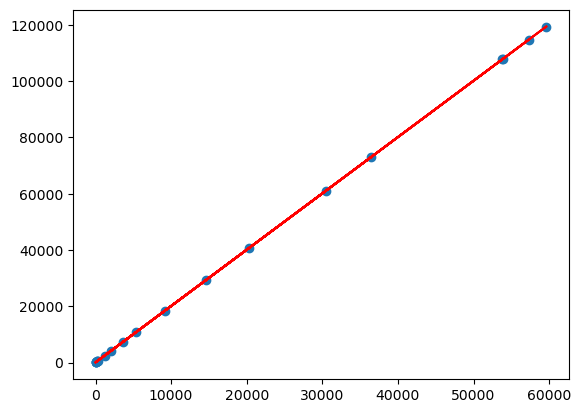

In [49]:
plt.scatter(xtest,ytest)
plt.plot(xtest, ypred, c = 'r')

In [50]:
from sklearn.metrics import r2_score
r2_score(ypred,ytest)

0.9999990298699151

# Approach 3rd

In [52]:
data = pd.read_csv("IceCreamSales.csv")
data.drop(['Unnamed: 0'], axis = 1, inplace= True)
X = data[['Temperature']]
y = data['IceCreamSales']

In [53]:
p_transform = PolynomialFeatures(degree = 3)

In [54]:
x_transformed = p_transform.fit_transform(X)

In [56]:
# x_transformed

In [57]:
x_transformed.shape

(100, 4)

In [58]:
xtrain, xtest, ytrain, ytest = train_test_split(x_transformed, y, test_size=0.2)

In [59]:
from sklearn.linear_model import LinearRegression
l_reg = LinearRegression()
l_reg.fit(xtrain,ytrain)

LinearRegression()

In [60]:
xtest

array([[1.00000000e+00, 3.28397292e+01, 1.07844781e+03, 3.54159341e+04],
       [1.00000000e+00, 1.27427581e+01, 1.62377884e+02, 2.06914210e+03],
       [1.00000000e+00, 5.27191450e+00, 2.77930825e+01, 1.46522754e+02],
       [1.00000000e+00, 3.71718479e+01, 1.38174628e+03, 5.13620624e+04],
       [1.00000000e+00, 2.41938208e+01, 5.85340964e+02, 1.41616344e+04],
       [1.00000000e+00, 1.13122785e+01, 1.27967645e+02, 1.44760564e+03],
       [1.00000000e+00, 2.40901887e+00, 5.80337189e+00, 1.39804324e+01],
       [1.00000000e+00, 2.27217824e+01, 5.16279397e+02, 1.17307881e+04],
       [1.00000000e+00, 2.58357645e+01, 6.67486728e+02, 1.72450299e+04],
       [1.00000000e+00, 4.80786245e+00, 2.31155413e+01, 1.11136343e+02],
       [1.00000000e+00, 1.75034885e+01, 3.06372108e+02, 5.36258065e+03],
       [1.00000000e+00, 3.31576012e+01, 1.09942652e+03, 3.64543459e+04],
       [1.00000000e+00, 1.84591745e+01, 3.40741123e+02, 6.28979984e+03],
       [1.00000000e+00, 3.48004859e+01, 1.21107382e

In [61]:
ytest

66     70886.227181
90      4284.327132
92       435.887039
89    102839.971994
73     28381.946861
76      3051.543074
43       194.280160
12     23571.990046
5      34684.854336
77       268.276111
6      10884.100284
98     72985.915190
22     12616.075436
19     84412.014401
23     61014.838856
67       273.039256
21     65362.038215
55       671.088396
53       237.605256
60       539.660810
Name: IceCreamSales, dtype: float64

In [62]:
ypred = l_reg.predict(xtest)

In [63]:
y

0     21200.216232
1     46969.537759
2     28155.054323
3     20730.330804
4      9907.404501
          ...     
95      920.989509
96    25884.973575
97       66.563119
98    72985.915190
99      100.887209
Name: IceCreamSales, Length: 100, dtype: float64

In [65]:
xtest

array([[1.00000000e+00, 3.28397292e+01, 1.07844781e+03, 3.54159341e+04],
       [1.00000000e+00, 1.27427581e+01, 1.62377884e+02, 2.06914210e+03],
       [1.00000000e+00, 5.27191450e+00, 2.77930825e+01, 1.46522754e+02],
       [1.00000000e+00, 3.71718479e+01, 1.38174628e+03, 5.13620624e+04],
       [1.00000000e+00, 2.41938208e+01, 5.85340964e+02, 1.41616344e+04],
       [1.00000000e+00, 1.13122785e+01, 1.27967645e+02, 1.44760564e+03],
       [1.00000000e+00, 2.40901887e+00, 5.80337189e+00, 1.39804324e+01],
       [1.00000000e+00, 2.27217824e+01, 5.16279397e+02, 1.17307881e+04],
       [1.00000000e+00, 2.58357645e+01, 6.67486728e+02, 1.72450299e+04],
       [1.00000000e+00, 4.80786245e+00, 2.31155413e+01, 1.11136343e+02],
       [1.00000000e+00, 1.75034885e+01, 3.06372108e+02, 5.36258065e+03],
       [1.00000000e+00, 3.31576012e+01, 1.09942652e+03, 3.64543459e+04],
       [1.00000000e+00, 1.84591745e+01, 3.40741123e+02, 6.28979984e+03],
       [1.00000000e+00, 3.48004859e+01, 1.21107382e

In [80]:
dct = {"xtest":xtest[:,1], "ytest" : ytest, "ypred":ypred}

In [81]:
output_df = pd.DataFrame(dct)

In [82]:
output_df

,xtest,ytest,ypred
66,32.839729,70886.227181,70937.676814
90,12.742758,4284.327132,4255.669906
92,5.271914,435.887039,398.003657
89,37.171848,102839.971994,102824.881363
73,24.193821,28381.946861,28438.748666
76,11.312279,3051.543074,3011.252213
43,2.409019,194.280160,124.142346
12,22.721782,23571.990046,23578.263097
5,25.835765,34684.854336,34603.978502
77,4.807862,268.276111,325.975063


In [83]:
output_df = output_df.sort_values('xtest')

In [84]:
output_df

,xtest,ytest,ypred
43,2.409019,194.280160,124.142346
67,3.884051,273.039256,218.202098
53,4.081792,237.605256,237.624351
77,4.807862,268.276111,325.975063
92,5.271914,435.887039,398.003657
60,6.358783,539.660810,621.882269
55,6.452381,671.088396,645.142408
76,11.312279,3051.543074,3011.252213
90,12.742758,4284.327132,4255.669906
6,17.503488,10884.100284,10844.137804


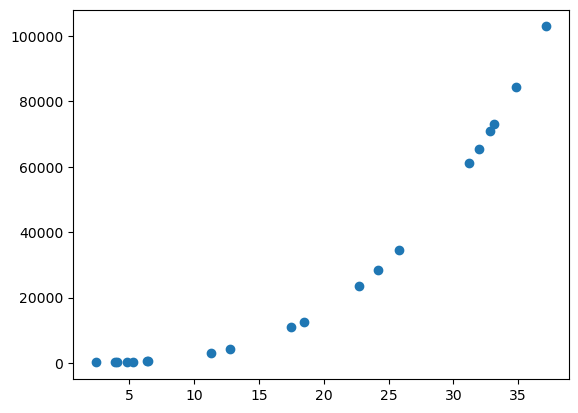

In [85]:
plt.scatter(output_df['xtest'],output_df['ytest'])

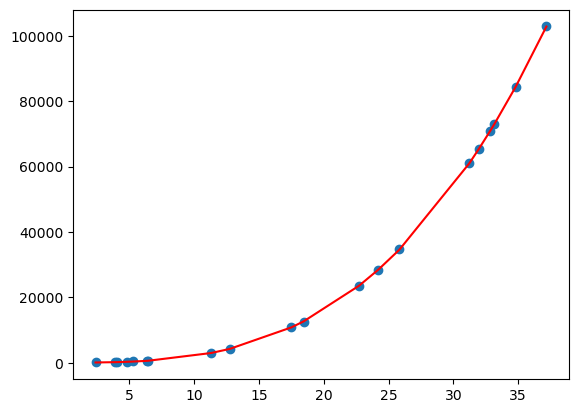

In [87]:
plt.scatter(output_df['xtest'],output_df['ytest'])
plt.plot(output_df['xtest'],output_df['ypred'], c= 'r')

### y = m1*x^0 + m2*x^1 + m3 * x^2 + m4 * x^3 + c

In [88]:
from sklearn.metrics import r2_score
r2_score(ypred,ytest)

0.9999976684131928